# Initial Exploration and Organization of Data

## Data Sources:<br>  Where and how the data was obtained

encoding is "ISO-8859-1"

https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv


ID = Unique Identifier
name = name
category
main_category
currency
deadline
goalGoal amount in project currency
launched
pledgedPledged amount in the project currency
state
backers
country
usd pledgedPledged amount in USD (conversion made by KS)
usd_pledged_realPledged amount in USD (conversion made by fixer.io api)
usd_goal_realGoal amount in USD


## Changes: <br> Documentation of major changes to the data 

## Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import missingno as miss
import os
import glob
from pathlib import Path
from datetime import datetime

## Importing Data

In [2]:
print(f"Current directory: {Path.cwd()}")
print(f"Home directory: {Path.home()}")

Current directory: /Users/davidburton/DS/M3/KickstarterSuccessClassifier/notebooks
Home directory: /Users/davidburton


In [19]:
#path = "/Users/davidburton/DS/M3/KickstarterSuccessClassifier/data/interim/ks-projects-201801.csv"
#path_processed = "/Users/davidburton/DS/M3/KickstarterSuccessClassifier/data/processed/ks-projects-201801.csv"
path_processed = "../data/processed/ks_processed.csv"

In [18]:
df = pd.read_csv(path,
                 encoding = "ISO-8859-1")
df.head(2)

,name,sub_category,category,currency,deadline,launched,outcome,backers,country,pledged,goal,deadline_dayofweek,deadline_weekofyear,launched_dayofweek,launched_weekofyear,launch_time,launch_hourofday,duration,duration_days
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 00:00:00,2015-08-11 12:12:28,failed,0,GB,0,1533,4,41,1,33,12:12:28,12,58 days 11:47:32.000000000,58
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01 00:00:00,2017-09-02 04:43:57,failed,15,US,2421,30000,2,44,5,35,04:43:57,4,59 days 19:16:03.000000000,59


# EDA first pass

## Shape and Summary Statistics 

In [5]:
#(378661, 15)
df.shape

(331675, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331675 entries, 0 to 331674
Data columns (total 19 columns):
name                   331672 non-null object
sub_category           331675 non-null object
category               331675 non-null object
currency               331675 non-null object
deadline               331675 non-null object
launched               331675 non-null object
outcome                331675 non-null object
backers                331675 non-null int64
country                331675 non-null object
pledged                331675 non-null int64
goal                   331675 non-null int64
deadline_dayofweek     331675 non-null int64
deadline_weekofyear    331675 non-null int64
launched_dayofweek     331675 non-null int64
launched_weekofyear    331675 non-null int64
launch_time            331675 non-null object
launch_hourofday       331675 non-null int64
duration               331675 non-null object
duration_days          331675 non-null int64
dtypes: int64(9), object

a few missing name (4) and the same amount of missing usd pledged

## Explore each feature

In [7]:
df.category.value_counts()[:10]

Film & Video    56527
Music           45949
Publishing      35445
Games           28521
Technology      27050
Art             25641
Design          25364
Food            22054
Fashion         19775
Theater         10242
Name: category, dtype: int64

In [8]:
df.category.unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Crafts', 'Games',
       'Design', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

In [11]:
#df.main_category.value_counts()

In [12]:
df.currency.value_counts()

USD    261511
GBP     29476
EUR     14378
CAD     12375
AUD      6621
SEK      1510
MXN      1411
NZD      1274
DKK       929
CHF       652
NOK       584
HKD       477
SGD       454
JPY        23
Name: currency, dtype: int64

In [13]:
df.deadline.unique()

array(['2015-10-09 00:00:00', '2017-11-01 00:00:00',
       '2013-02-26 00:00:00', ..., '2009-07-30 00:00:00',
       '2009-08-21 00:00:00', '2009-12-28 00:00:00'], dtype=object)

In [15]:
#df.state.value_counts()

In [16]:
# I'm only interested in successful and failed campaigns
# Drop everything else

df = df[~df['state'].isin(['canceled', 'undefined', 'live', 'suspended'])]

KeyError: 'state'

In [14]:
# checking to see how many rows I dropped
df.shape

(331675, 15)

In [15]:
df.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [16]:
df.usd_goal_real.sum()

13767829761.720003

In [17]:
df["usd_pledged_real"].describe()

count    3.316750e+05
mean     9.943461e+03
std      9.673293e+04
min      0.000000e+00
25%      5.000000e+01
50%      7.880000e+02
75%      4.608000e+03
max      2.033899e+07
Name: usd_pledged_real, dtype: float64

In [18]:
df["usd pledged"].describe()

count    3.314650e+05
mean     7.684569e+03
std      8.320938e+04
min      0.000000e+00
25%      2.500000e+01
50%      5.020000e+02
75%      3.421000e+03
max      2.033899e+07
Name: usd pledged, dtype: float64

In [19]:
df = df.drop(['usd pledged'],axis=1)

In [20]:
df.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

## Deal with Missing Values

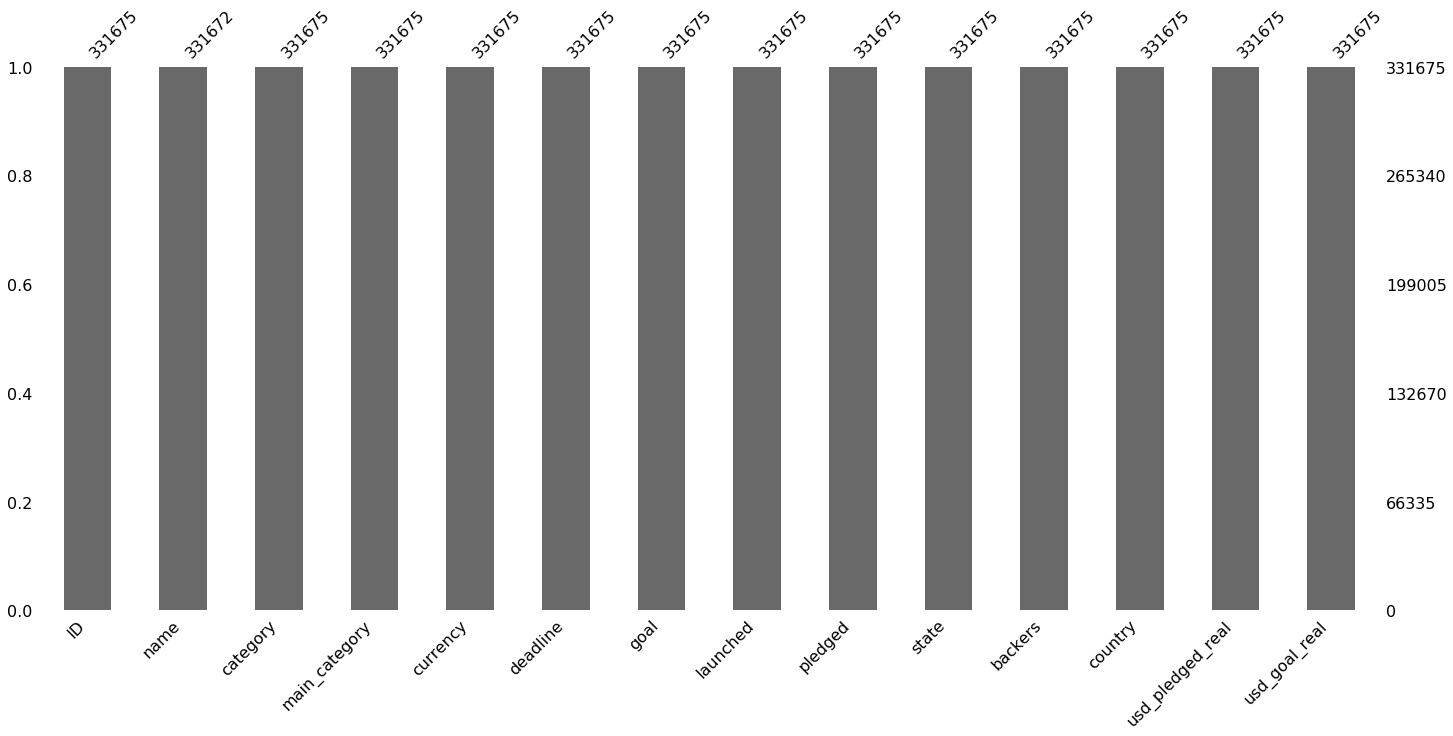

In [21]:
# Where's the missing data?
miss.bar(df)

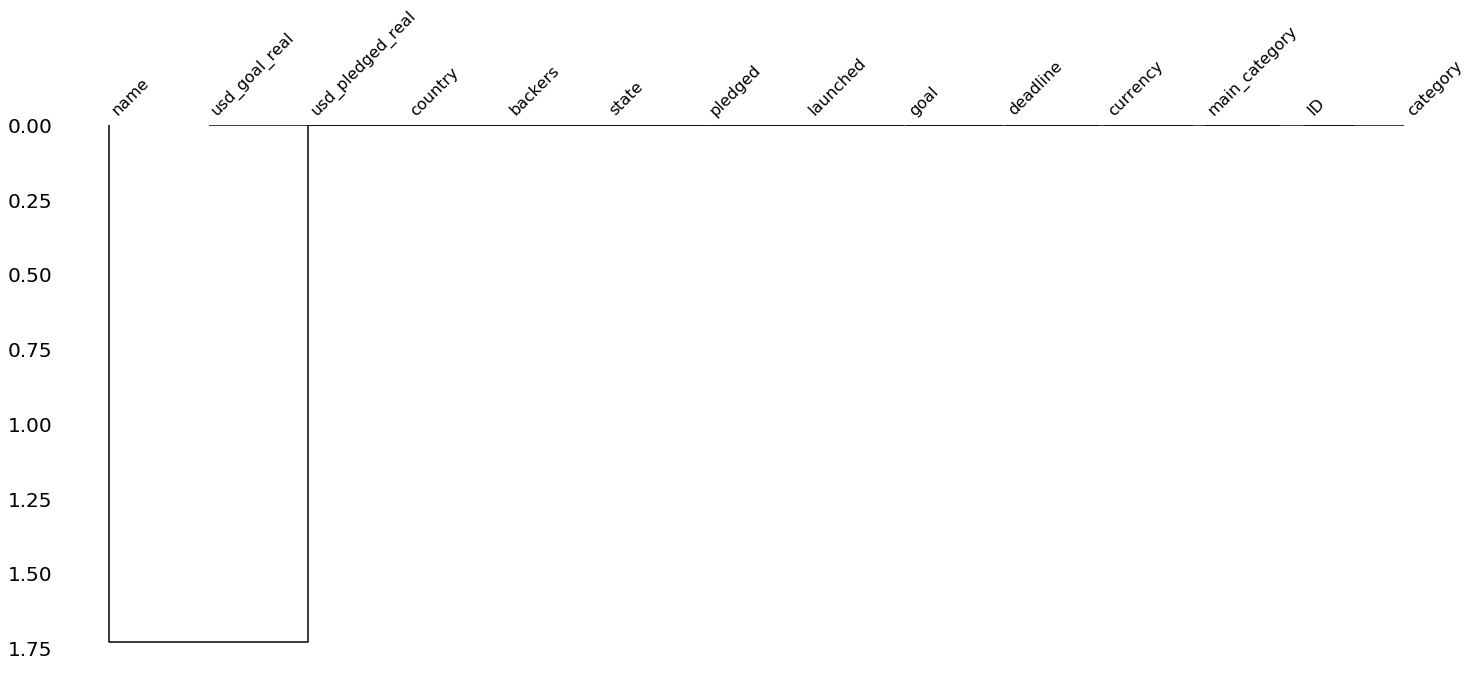

In [22]:
miss.dendrogram(df)

Hierarchical clustering is where you build a cluster tree (a dendrogram) to represent data, where each group (or “node”) links to two or more successor groups. The groups are nested and organized as a tree, which ideally ends up as a meaningful classification scheme.

Each node in the cluster tree contains a group of similar data; Nodes group on the graph next to other, similar nodes. Clusters at one level join with clusters in the next level up, using a degree of similarity; The process carries on until all nodes are in the tree, which gives a visual snapshot of the data contained in the whole set. The total number of clusters is not predetermined before you start the tree creation.

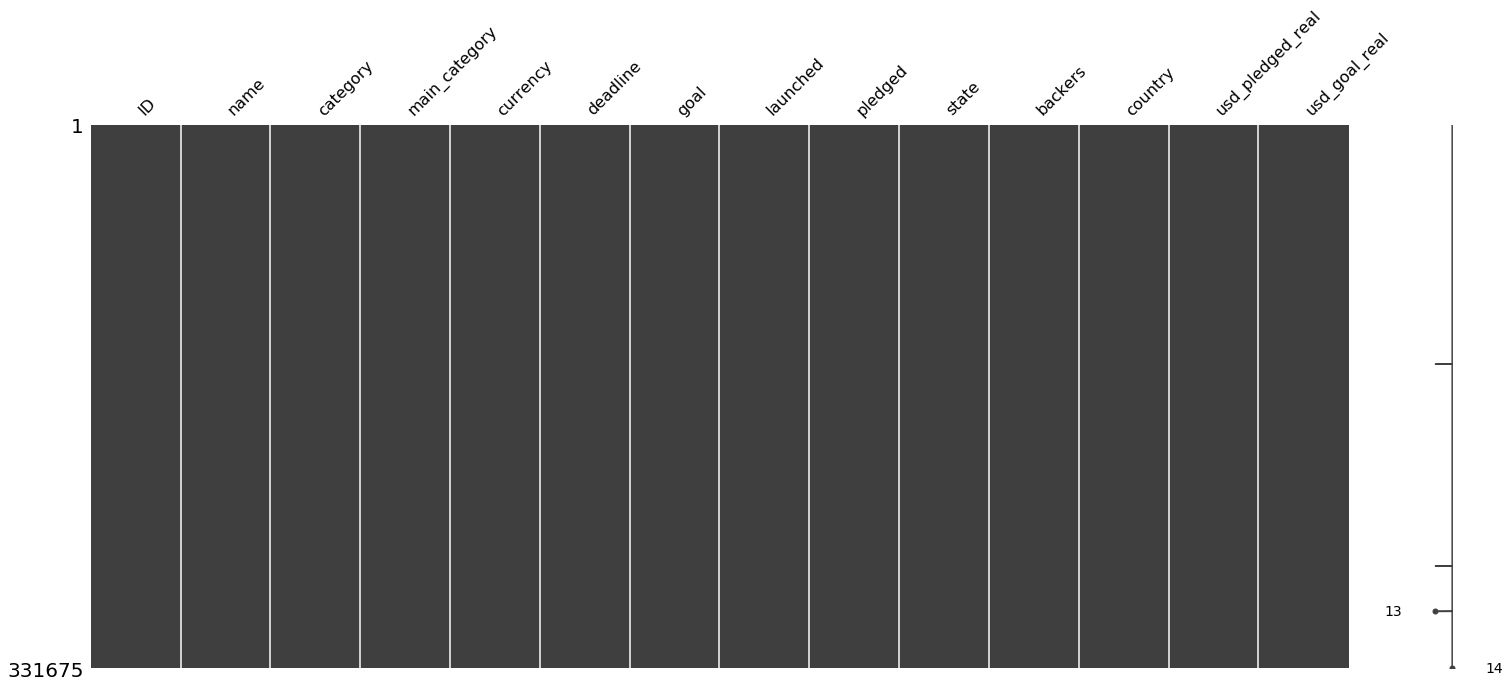

In [23]:
miss.matrix(df)

In [24]:
df.isnull().sum()

ID                  0
name                3
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [25]:
# drop the useless columns
# df = df.drop(['name'],axis=1)

In [26]:
df.shape

(331675, 14)

## Checking for duplicated values

In [27]:
df.duplicated('ID').sum()

0

In [28]:
# sanity check
df.describe()

,ID,goal,pledged,backers,usd_pledged_real,usd_goal_real
count,3.316750e+05,3.316750e+05,3.316750e+05,331675.000000,3.316750e+05,3.316750e+05
mean,1.074271e+09,4.425157e+04,1.058400e+04,116.381581,9.943461e+03,4.151000e+04
std,6.191924e+08,1.117917e+06,1.015917e+05,965.427268,9.673293e+04,1.108930e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,1.000000e-02
25%,5.371725e+08,2.000000e+03,5.000000e+01,2.000000,5.000000e+01,2.000000e+03
50%,1.074573e+09,5.000000e+03,7.820000e+02,15.000000,7.880000e+02,5.000000e+03
75%,1.609844e+09,1.500000e+04,4.657000e+03,63.000000,4.608000e+03,1.500000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,1.663614e+08


## Dealing With Dates

In [29]:
df.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [30]:
df.deadline = pd.to_datetime(df.deadline, infer_datetime_format=True)

In [31]:
df.head(1)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,1533.95


In [32]:
df['deadline_dayofweek'] = df.deadline.dt.dayofweek

In [33]:
df['deadline_weekofyear'] = df.deadline.dt.weekofyear

In [34]:
#sanity check
df.head(2)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,deadline_dayofweek,deadline_weekofyear
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,1533.95,4,41
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,2421.0,30000.00,2,44


In [35]:
df.launched = pd.to_datetime(df.launched, infer_datetime_format=True)

In [36]:
df.dtypes

ID                              int64
name                           object
category                       object
main_category                  object
currency                       object
deadline               datetime64[ns]
goal                          float64
launched               datetime64[ns]
pledged                       float64
state                          object
backers                         int64
country                        object
usd_pledged_real              float64
usd_goal_real                 float64
deadline_dayofweek              int64
deadline_weekofyear             int64
dtype: object

In [37]:
df['launched_dayofweek'] = df.launched.dt.dayofweek

In [38]:
df['launched_weekofyear'] = df.launched.dt.weekofyear

Sanity check do the days match the dates according to calendar?


In [39]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,deadline_dayofweek,deadline_weekofyear,launched_dayofweek,launched_weekofyear
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,1533.95,4,41,1,33
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,2421.0,30000.00,2,44,5,35
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,45000.00,1,9,5,2
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,5000.00,0,16,5,11
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,50000.00,4,13,4,8


Series.dt.dayofweek
The day of the week with Monday=0, Sunday=6.

Return the day of the week. It is assumed the week starts on Monday, which is denoted by 0 and ends on Sunday which is denoted by 6. This method is available on both Series with datetime values (using the dt accessor) or DatetimeIndex.

date = 8-11-2015<br> day of week= 1 <br> 1 = Tuesday <br> Accurate

date = 1-12-2013<br> day of week= 5 <br> 5 = Saturday <br> Accurate

In [40]:
df['launch_time'] = df.launched.dt.time

In [41]:
df['launch_hourofday'] = df.launched.dt.hour

In [42]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,deadline_dayofweek,deadline_weekofyear,launched_dayofweek,launched_weekofyear,launch_time,launch_hourofday
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,1533.95,4,41,1,33,12:12:28,12
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,2421.0,30000.00,2,44,5,35,04:43:57,4
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,45000.00,1,9,5,2,00:20:50,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,5000.00,0,16,5,11,03:24:11,3
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,50000.00,4,13,4,8,13:38:27,13


In [43]:
df.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd_pledged_real', 'usd_goal_real', 'deadline_dayofweek',
       'deadline_weekofyear', 'launched_dayofweek', 'launched_weekofyear',
       'launch_time', 'launch_hourofday'],
      dtype='object')

In [44]:
df['duration'] = df['deadline'] - df['launched']

In [45]:
df.head(2)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,country,usd_pledged_real,usd_goal_real,deadline_dayofweek,deadline_weekofyear,launched_dayofweek,launched_weekofyear,launch_time,launch_hourofday,duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,...,GB,0.0,1533.95,4,41,1,33,12:12:28,12,58 days 11:47:32
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,...,US,2421.0,30000.00,2,44,5,35,04:43:57,4,59 days 19:16:03


In [46]:
df['duration_days'] = df.duration.dt.days

In [47]:
df.duration_days.describe()

count    331675.000000
mean         32.954902
std          12.713329
min           0.000000
25%          29.000000
50%          29.000000
75%          35.000000
max          91.000000
Name: duration_days, dtype: float64

In [48]:
df.duration_days.value_counts()

29    148478
59     27969
44     15241
30     11724
34      8619
39      8594
31      6467
20      6125
19      6059
28      5540
24      5518
32      5070
14      4860
27      4848
13      3848
33      3210
35      3017
26      2654
21      2461
25      2373
23      2305
36      2279
49      2193
9       2081
22      2061
37      1908
45      1806
41      1731
38      1682
6       1642
       ...  
2        194
1        129
62       124
65       107
87       105
64       105
69        98
0         92
63        83
70        82
74        81
75        75
71        74
66        69
67        61
86        61
79        59
85        59
68        57
84        56
80        49
77        49
72        49
82        47
83        47
81        46
76        45
73        43
78        35
91        22
Name: duration_days, Length: 92, dtype: int64

# change column names

In [49]:
df.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd_pledged_real', 'usd_goal_real', 'deadline_dayofweek',
       'deadline_weekofyear', 'launched_dayofweek', 'launched_weekofyear',
       'launch_time', 'launch_hourofday', 'duration', 'duration_days'],
      dtype='object')

In [50]:
# drop other useless categories
df = df.drop(['goal'],axis=1)
df = df.drop(['pledged'],axis=1)

In [51]:
df.rename({'category':'sub_category',
           'main_category':'category',
           'state':'outcome',
           'usd_pledged_real':'pledged', 
           'usd_goal_real':'goal'}, axis='columns', inplace = True)


In [52]:
df.head()

,ID,name,sub_category,category,currency,deadline,launched,outcome,backers,country,pledged,goal,deadline_dayofweek,deadline_weekofyear,launched_dayofweek,launched_weekofyear,launch_time,launch_hourofday,duration,duration_days
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95,4,41,1,33,12:12:28,12,58 days 11:47:32,58
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00,2,44,5,35,04:43:57,4,59 days 19:16:03,59
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00,1,9,5,2,00:20:50,0,44 days 23:39:10,44
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00,0,16,5,11,03:24:11,3,29 days 20:35:49,29
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,2016-02-26 13:38:27,successful,224,US,52375.0,50000.00,4,13,4,8,13:38:27,13,34 days 10:21:33,34


In [53]:
#df['outcome'] = df["outcome"].replace({'failed': 0, 'successful' : 1}, inplace=True)

In [54]:
df.head()

,ID,name,sub_category,category,currency,deadline,launched,outcome,backers,country,pledged,goal,deadline_dayofweek,deadline_weekofyear,launched_dayofweek,launched_weekofyear,launch_time,launch_hourofday,duration,duration_days
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95,4,41,1,33,12:12:28,12,58 days 11:47:32,58
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00,2,44,5,35,04:43:57,4,59 days 19:16:03,59
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00,1,9,5,2,00:20:50,0,44 days 23:39:10,44
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00,0,16,5,11,03:24:11,3,29 days 20:35:49,29
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,2016-02-26 13:38:27,successful,224,US,52375.0,50000.00,4,13,4,8,13:38:27,13,34 days 10:21:33,34


In [55]:
# drop other useless categories
df = df.drop(['ID'],axis=1)

In [56]:
df.dtypes

name                            object
sub_category                    object
category                        object
currency                        object
deadline                datetime64[ns]
launched                datetime64[ns]
outcome                         object
backers                          int64
country                         object
pledged                        float64
goal                           float64
deadline_dayofweek               int64
deadline_weekofyear              int64
launched_dayofweek               int64
launched_weekofyear              int64
launch_time                     object
launch_hourofday                 int64
duration               timedelta64[ns]
duration_days                    int64
dtype: object

In [57]:
df['goal'] = df["goal"].astype(int)

In [58]:
df['pledged'] = df["pledged"].astype(int)

## Export Scrubbed Data Frame into interim

In [20]:
df.to_csv( path_processed, index=False )